## 4. NumPy Operations

### 4.1 Arithmetic operations

All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*:

In [1]:
import numpy as np
arr = np.arange(0,10)

In [2]:
arr + arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [5]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [6]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# Warning on division by zero, but not an error!
# Just replaced with nan
arr/arr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [8]:
# Also warning, but not an error instead infinity
1/arr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111])

In [9]:
arr**3

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [10]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


### 4.2. Vectorization
    - https://numpy.org/doc/stable/glossary.html#term-vectorization
    
    Most of the application has to deal with a large number of datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can take result in a model that takes ages to run. To make sure that the code is computationally efficient, we will use vectorization.


    What is Vectorization ?
    
    Vectorization describes the absence of any explicit looping, indexing, etc., in the code: these things are taking place, of course, just “behind the scenes” in optimized, pre-compiled C code. 
    Vectorized code has many advantages, among which are:
    * vectorized code is more concise and easier to read
    * fewer lines of code generally means fewer bugs
    * the code more closely resembles standard mathematical notation (making it easier, typically, to correctly code mathematical constructs)
    * vectorization results in more “Pythonic” code. Without vectorization, our code would be littered with inefficient and difficult to read for loops.

    Using such a function can help in minimizing the running time of code efficiently. Various operations are being performed over vector such as dot product of vectors which is also known as scalar product as it produces single output, outer products which results in square matrix of dimension equal to length X length of the vectors, Element wise multiplication which products the element of same indexes and dimension of the matrix remain unchanged. 
    
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called *vectorization*. This way, you can benefit from NumPy's many optimizations.

In [2]:
# Dot product 
import time 
import numpy 
import array 

# 8 bytes size int 
a = array.array('q') 
for i in range(100000): 
	a.append(i); 

b = array.array('q') 
for i in range(100000, 200000): 
	b.append(i) 

# classic dot product of vectors implementation 
tic = time.process_time() 
dot = 0.0; 

for i in range(len(a)): 
	dot += a[i] * b[i] 

toc = time.process_time() 

print("dot_product = "+ str(dot)); 
print("Computation time = " + str(1000*(toc - tic )) + "ms") 


n_tic = time.process_time() 
n_dot_product = numpy.dot(a, b) 
n_toc = time.process_time() 

print("\nn_dot_product = "+str(n_dot_product)) 
print("Computation time = "+str(1000*(n_toc - n_tic ))+"ms") 


dot_product = 833323333350000.0
Computation time = 31.25ms

n_dot_product = 833323333350000
Computation time = 0.0ms


Let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A **bad** option would be to do the math in python using nested loops:

In [ ]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's vectorize this algorithm. First, we will use NumPy's `meshgrid` function which generates coordinate matrices from coordinate vectors.

In [11]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

As you can see, both `X` and `Y` are 768x1024 arrays, and all values in `X` correspond to the horizontal coordinate, while all values in `Y` correspond to the the vertical coordinate.

Now we can simply compute the result using array operations:

In [12]:
data = np.sin(X*Y/40.5)

Now we can plot this data using matplotlib's `imshow` function (see the [matplotlib tutorial](tools_matplotlib.ipynb)).

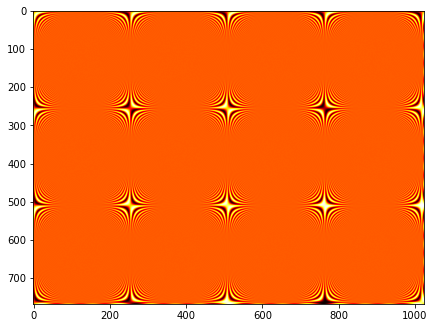

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot, interpolation="bicubic")
plt.show()

### 4.3. Broadcasting
    - https://numpy.org/doc/stable/user/basics.broadcasting.html
    - https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    - https://numpy.org/doc/stable/user/basics.broadcasting.html#module-numpy.doc.broadcasting
    
    
The term broadcasting refers to how numpy treats arrays with different Dimension during arithmetic operations which lead to certain constraints, the smaller array is broadcast across the larger array so that they have compatible shapes.
     
    Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python as we know that Numpy implemented in C. It does this without making needless copies of data and which leads to efficient algorithm implementations. There are cases where broadcasting is a bad idea because it leads to inefficient use of memory that slow down the computation.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

The result is equivalent to the previous example where b was an array. We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

`General Broadcasting Rules`

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when

1. they are equal, or
2. one of them is 1

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Arrays do not need to have the same number of dimensions. For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:
`Image  (3d array): 256 x 256 x 3`

`Scale  (1d array):             3`

`Result (3d array): 256 x 256 x 3`

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

----------------------------------

`A      (4d array):  8 x 1 x 6 x 1`

`B      (3d array):      7 x 1 x 5`

`Result (4d array):  8 x 7 x 6 x 5`

----------------------------------

`A      (2d array):  5 x 4`

`B      (1d array):      1`

`Result (2d array):  5 x 4`

----------------------------------

`A      (2d array):  5 x 4`

`B      (1d array):      4`

`Result (2d array):  5 x 4`

----------------------------------

`A      (3d array):  15 x 3 x 5`

`B      (3d array):  15 x 1 x 5`

`Result (3d array):  15 x 3 x 5`

----------------------------------

`A      (3d array):  15 x 3 x 5`

`B      (2d array):       3 x 5`

`Result (3d array):  15 x 3 x 5`

----------------------------------

`A      (3d array):  15 x 3 x 5`

`B      (2d array):       3 x 1`

`Result (3d array):  15 x 3 x 5`

----------------------------------

`A      (1d array):  3`

`B      (1d array):  4 # trailing dimensions do not match`

----------------------------------

`A      (2d array):      2 x 1`

`B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched`

In [19]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

print('x', x.shape)

print('y', y.shape)

print('x+y', x + y)

x (4,)
y (5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [21]:
print('xx:', xx.shape)

print('y:', y.shape)

print('xx+y:',(xx + y).shape)

print(xx + y)

print(x.shape)

print(z.shape)

print('x+z:',(x + z).shape)


print(x + z)

xx: (4, 1)
y: (5,)
xx+y: (4, 5)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
(4,)
(3, 4)
x+z: (3, 4)
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [28]:
a = np.array([0.0, 10.0, 20.0, 30.0])
print('a:', a.shape, a)
b = np.array([1.0, 2.0, 3.0])
print('b:', b.shape, b)

print('a+axe:',a[:, np.newaxis].shape, a[:, np.newaxis])
a[:, np.newaxis] + b

a: (4,) [ 0. 10. 20. 30.]
b: (3,) [1. 2. 3.]
a+axe: (4, 1) [[ 0.]
 [10.]
 [20.]
 [30.]]


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

Here the newaxis index operator inserts a new axis into a, making it a two-dimensional 4x1 array. Combining the 4x1 array with b, which has shape (3,), yields a 4x3 array.

### 4.4. Universal Array Functions

A universal function (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.

    In NumPy, universal functions are instances of the numpy.ufunc class. Many of the built-in functions are implemented in compiled C code. The basic ufuncs operate on scalars, but there is also a generalized kind for which the basic elements are sub-arrays (vectors, matrices, etc.), and broadcasting is done over other dimensions. One can also produce custom ufunc instances using the frompyfunc factory function.

    There are currently more than 60 universal functions defined in numpy on one or more types, covering a wide variety of operations. Some of these ufuncs are called automatically on arrays when the relevant infix notation is used (e.g., add(a, b) is called internally when a + b is written and a or b is an ndarray). Nevertheless, you may still want to use the ufunc call in order to use the optional output argument(s) to place the output(s) in an object (or objects) of your choice.

These functions include standard trigonometric functions, functions for arithmetic operations, handling complex numbers, statistical functions, etc. Numpy comes with many [universal array functions](http://docs.scipy.org/doc/numpy/reference/ufuncs.html), which are essentially just mathematical operations you can use to perform the operation across the array. Let's show some common ones:

In [ ]:
#Taking Square Roots
np.sqrt(arr)

In [ ]:
#Calcualting exponential (e^)
np.exp(arr)

In [ ]:
np.max(arr) #same as arr.max()

In [ ]:
np.sin(arr)

In [ ]:
np.log(arr)

In [15]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [16]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [17]:
np.maximum(a,b)

array([2, 8, 3, 7])

In [4]:
# Python code demonstrate statistical function 
import numpy as np 

# construct a weight array 
weight = np.array([50.7, 52.5, 50, 58, 55.63, 73.25, 49.5, 45]) 

# minimum and maximum 
print('Minimum and maximum weight of the students: ') 
print(np.amin(weight), np.amax(weight)) 

# range of weight i.e. max weight-min weight 
print('Range of the weight of the students: ') 
print(np.ptp(weight)) 

# percentile 
print('Weight below which 70 % student fall: ') 
print(np.percentile(weight, 70)) 

# mean 
print('Mean weight of the students: ') 
print(np.mean(weight)) 

# median 
print('Median weight of the students: ') 
print(np.median(weight)) 

# standard deviation 
print('Standard deviation of weight of the students: ') 
print(np.std(weight)) 

# variance 
print('Variance of weight of the students: ') 
print(np.var(weight)) 

# average 
print('Average weight of the students: ') 
print(np.average(weight)) 


Minimum and maximum weight of the students: 
45.0 73.25
Range of the weight of the students: 
28.25
Weight below which 70 % student fall: 
55.317
Mean weight of the students: 
54.3225
Median weight of the students: 
51.6
Standard deviation of weight of the students: 
8.052773978574091
Variance of weight of the students: 
64.84716875
Average weight of the students: 
54.3225
